In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('books.csv', sep=';', on_bad_lines='skip', encoding='latin-1')

C:\Users\User\AppData\Local\Temp\ipykernel_2364\81279356.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv', sep=';', on_bad_lines='skip', encoding='latin-1')


In [3]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
books.shape

(271360, 8)

In [5]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [6]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [7]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [8]:
books.rename(columns={'Book-Title': 'title', 'Book-Author': 'author', 'Year-Of-Publication': 'year', 'Publisher': 'publisher', 'Image-URL-L': 'img_url'}, inplace=True)

In [9]:
books.head(2)

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [10]:
users = pd.read_csv('users.csv', sep=';', on_bad_lines='skip', encoding='latin-1')

In [11]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [12]:
users.shape

(278858, 3)

In [13]:
ratings = pd.read_csv('ratings.csv', sep=';', on_bad_lines='skip', encoding='latin-1')

In [14]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [15]:
ratings.rename(columns={'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

In [16]:
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [17]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


In [18]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [19]:
ratings['user_id'].unique().shape

(105283,)

In [20]:
x = ratings['user_id'].value_counts() > 200

In [21]:
x

user_id
11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: count, Length: 105283, dtype: bool

In [22]:
x[x].shape

(899,)

In [23]:
y = x[x].index

In [24]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [25]:
ratings = ratings[ratings['user_id'].isin(y)]


In [26]:
books.head(2)

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [27]:
ratings_with_books = ratings.merge(books, on = 'ISBN')

In [28]:
ratings_with_books

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...


In [29]:
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [30]:
num_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [31]:
num_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [32]:
num_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [33]:
final_rating = ratings_with_books.merge(num_rating, on ='title')

In [34]:
final_rating.head(2)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [35]:
final_rating.shape

(487671, 9)

In [36]:
final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [37]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [38]:
final_rating.shape

(61853, 9)

In [39]:
final_rating.drop_duplicates(['title','user_id'], inplace=True)

In [40]:
final_rating.shape

(59850, 9)

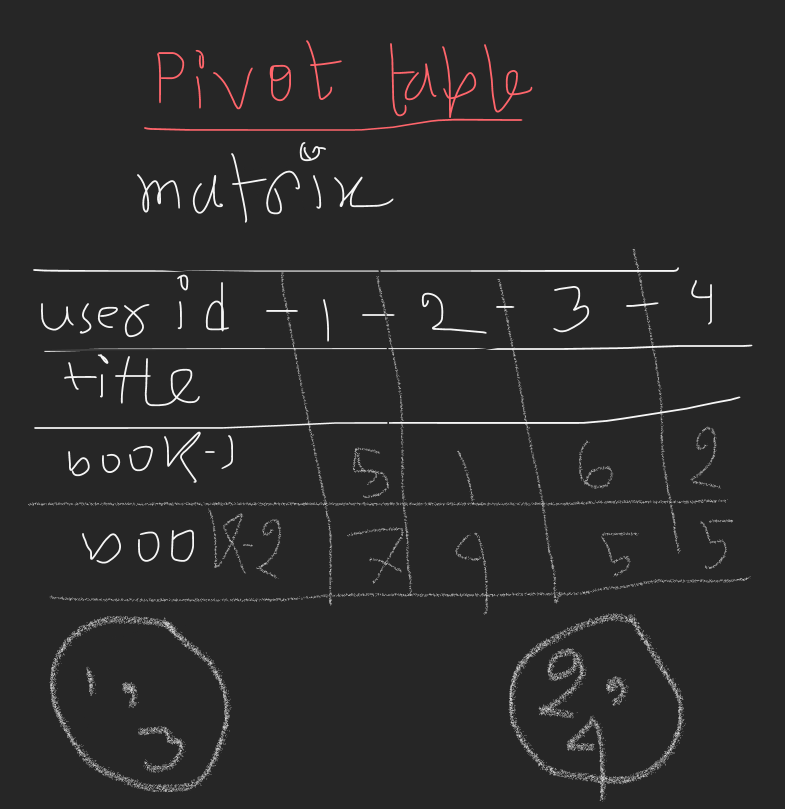

In [41]:
 from IPython.display import Image, display

image_name = 'pivot.PNG'
display(Image(filename=image_name,width=300, height=300))


In [42]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values = 'rating')

In [43]:
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN


In [44]:
book_pivot.shape

(742, 888)

In [45]:
book_pivot.fillna(0, inplace=True)

In [46]:
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [47]:
from scipy.sparse import csr_matrix

In [48]:
book_sparse = csr_matrix(book_pivot)

In [49]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.neighbors import NearestNeighbors

In [51]:
model = NearestNeighbors(algorithm='brute')

In [52]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [53]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1,-1), n_neighbors=6)

In [54]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [57]:
suggestion

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [59]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [60]:
book_pivot.index[5]

'A Bend in the Road'

In [61]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [62]:
books_name = book_pivot.index

***Save the model***

In [63]:
import pickle

In [66]:
pickle.dump(model, open('booksrcmdation/model.pkl', 'wb'))
pickle.dump(books_name, open('booksrcmdation/books_name.pkl', 'wb'))
pickle.dump(final_rating, open('booksrcmdation/final_rating.pkl', 'wb'))
pickle.dump(book_pivot, open('booksrcmdation/book_pivot.pkl', 'wb'))

In [68]:
def recommend_books(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1,-1), n_neighbors=6)
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [69]:
book_name = input("Enter the name of the book: ")
recommend_books(book_name)

Enter the name of the book:  Harry Potter and the Chamber of Secrets (Book 2)


Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
The Cradle Will Fall
